## Introduction ##

Computer science students at UBC, part of the Pacific Laboratory for Artificial Intelligence (PLAI), are conducting a research study to collect data for how humans play video games. The data collection works by the participant logging on to the plai.ai where they can play minecraft for free, and the AWS-EC2-based platform collects the data by recording the players’ sessions and demographics (PLAICraft, n.d.). The data will be used to develop and improve AI agents to possess human-like behaviors. Conducting this research study is difficult. To increase data collection, researchers need to make targeted recruitment efforts to acquire the best kinds of participants for this study.


We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. We are curious about whether or not played_hour and age can predict the experience of the player in players.csv. 
   
The dataset players.csv consists of 196 rows and 7 columns, providing information about player characteristics and gaming activity. The experience column is a categorical variable that classifies players into different levels: Pro, Veteran, Amateur, Regular, and Beginner. The subscribe column is a Boolean variable (TRUE/FALSE) indicating whether a player has an active subscription. To maintain anonymity, the hashedEmail column contains a hashed version of the player's email. The played_hours column is a numeric variable representing the total number of hours a player has played, ranging from 0 to 223.1. The name column contains player names, while the gender column is a categorical variable with values "Male" or "Female." Lastly, the age column is a numerical variable representing the player's age, ranging from 8 to 50, with some missing values (NA). In this analysis, we specifically used three key variables: played_hours, age, and experience. The played_hours variable represents the total time a player has spent playing, where higher values may indicate greater experience. The age variable may influence a player’s experience, as older players might have had more opportunities to gain experience over time. The experience variable serves as the target variable in this study, which we aim to predict based on the other two variables. 


## Methods ## 

### Preliminary Data Anaylsis and Visualizations ### 

##### Loading Data into R #### 
First, we loaded the players.csv data frame into Github to create a raw url link to reproducibly load the data into R. Then we read the data frame.  

In [1]:
#loading data (both set)
library(repr)
library(tidyverse)
library(tidymodels)


players_data<- read_csv("https://raw.githubusercontent.com/ananandrea/toy_ds_project/refs/heads/main/players.csv")
head(players_data)
tail(players_data) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


##### Data Wrangling #####
To clean and wrangle the data we selected the three relevant columns to our predictive question: played_hour, age, and experience. These values will be used in the classification model. Next, we removed the NA values from the age column to ensure these values do not affect our analysis. Lastly, we filtered the rows to remove all values when played_hours is 0 as these values do not contribute meaningful information regarding player engagement.  

In [2]:
library(scales)

players_tidyset <- players_data |> select(experience, Age, played_hours) |> drop_na(Age, played_hours, experience) |> filter(played_hours != 0) |>
                    mutate(experience = as_factor(experience))
tail(players_tidyset) 


experience,Age,played_hours
<fct>,<dbl>,<dbl>
Amateur,22,32.0
Pro,17,1.7
Regular,18,0.1
Veteran,44,0.1
Veteran,22,0.3
Amateur,17,2.3


Delete this cell? 
This is the mean value for Age and played_hours in the players.csv data set. I selected played _hours and Age columns and use the map_df function to take the mean of both Age and played_hours. Since Age has NA hence, I used na.rm = TRUE to remove data containing NA

In [3]:
# delete this one too? 
mean_values<- players_data |> select(played_hours, Age) |>
  map_df(mean, na.rm = TRUE)

mean_values

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


Summary Statistics of Players Data 

In [4]:
summarize(players_data,
    min_age = min(Age, na.rm=TRUE),
    max_age = max(Age, na.rm=TRUE),
    mean_age= mean(Age, na.rm=TRUE),
    sd_age = sd(Age, na.rm=TRUE), 
    median_age=median(Age, na.rm=TRUE),
    min_hours = min(played_hours, na.rm=TRUE), 
    max_hours = max(played_hours, na.rm=TRUE), 
    mean_hours= mean(played_hours, na.rm=TRUE),
    sd_hours=sd(played_hours, na.rm=TRUE), 
    median_hours=median(played_hours, na.rm=TRUE))

min_age,max_age,mean_age,sd_age,median_age,min_hours,max_hours,mean_hours,sd_hours,median_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,50,20.52062,6.174667,19,0,223.1,5.845918,28.35734,0.1


##### Visualisations ##### 
The first visualization compares age to experience level. The mean age for each experience level was calculated and displayed in a bar graph. This observation suggests age may influence gaming skill, but the variables seem to be weakly correlated to each other. 


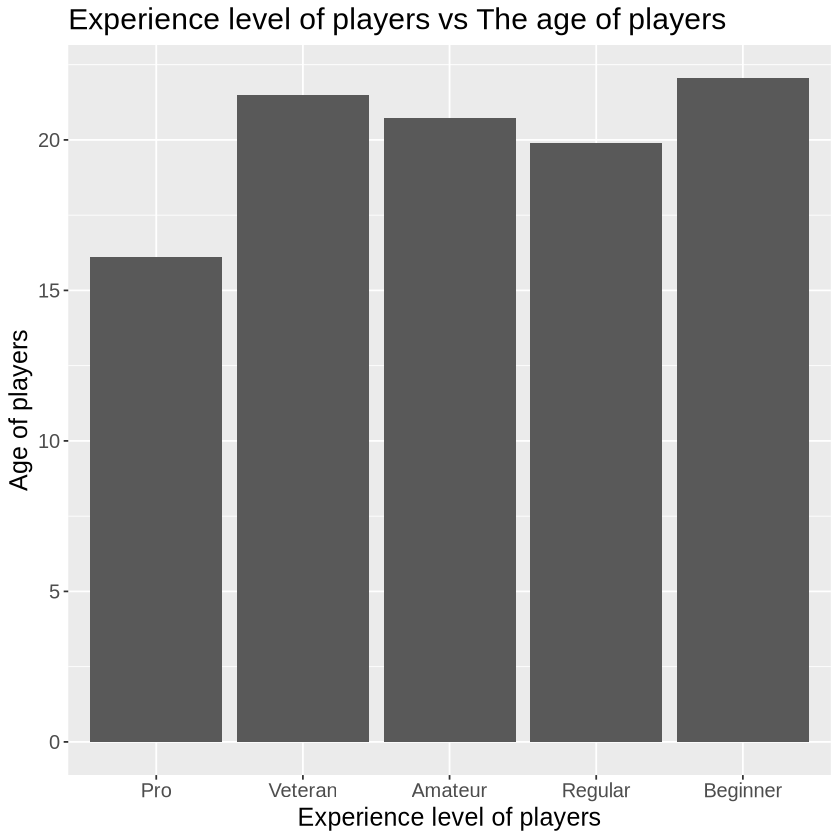

In [5]:
age_plot <- players_tidyset |> group_by(experience) |> 
            summarize(avg_age = mean(Age, na.rm = TRUE)) |>
            ggplot(aes(x = experience, y = avg_age)) + geom_bar(stat = "identity") +
                    labs(x = "Experience level of players", y = "Age of players", 
                         title = "Experience level of players vs The age of players") + theme(text = element_text(size = 15)) 
age_plot


The second and third visualizations, one plot with logarithmic scaling and one without, illustrate the relationship between age, total playtime, and experience level. In the log-scaled graph, most data points are concentrated in the 15-29 age range, showing that experience levels vary widely within this group, making age a weak predictor variable.  However, playtime shows a clearer distinction, with higher playtimes linked to Regular and Veteran experience levels. These insights suggest that playtime is a stronger predictor of experience than the age variable, and a predictive model may perform better when playtime is transformed (e.g., using a log scale) to capture patterns more effectively.  

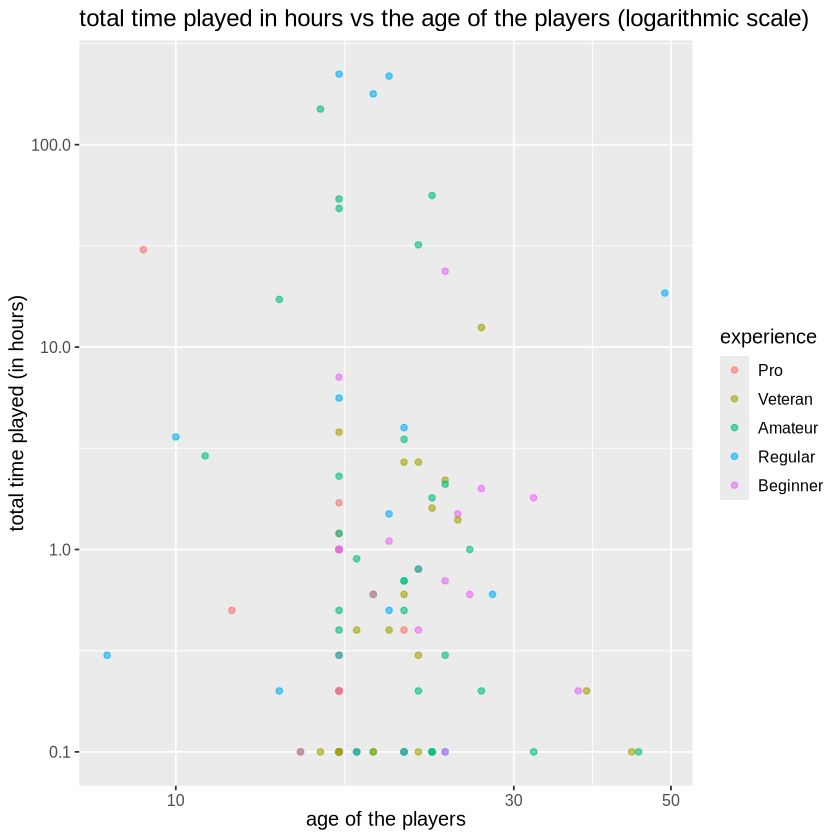

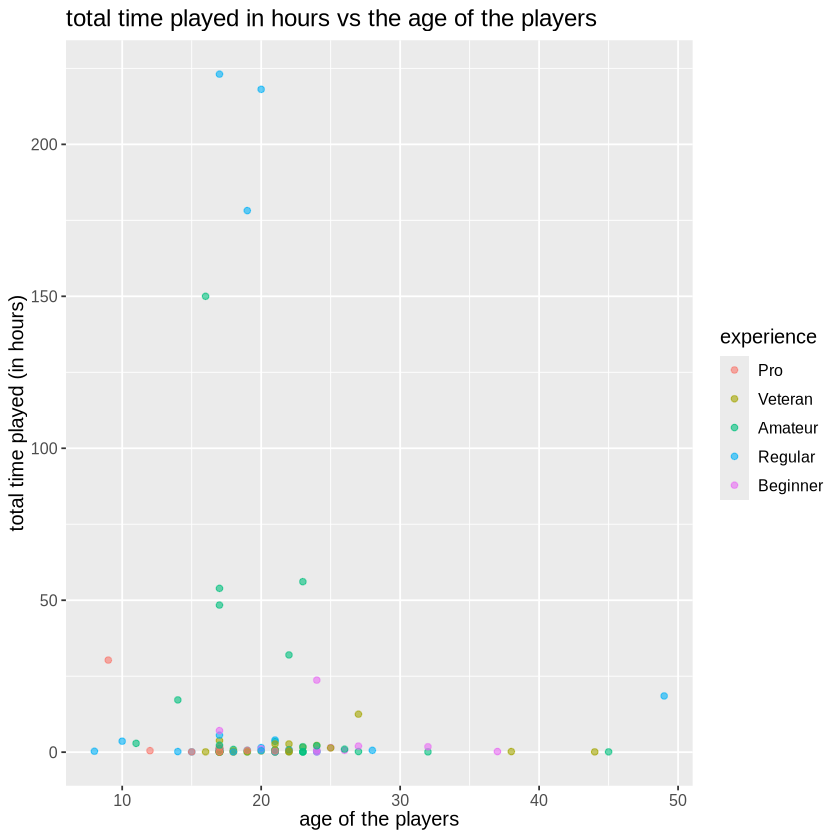

In [6]:
age_vs_playedtime_logplot <- players_tidyset|> ggplot(aes(x = Age, y = played_hours, color = experience	))+ geom_point(alpha = 0.6) + 
                    labs(x = "age of the players", y = "total time played (in hours)", 
                         title = "total time played in hours vs the age of the players (logarithmic scale) ") + theme(text = element_text(size = 12)) +
                         scale_x_log10(labels = label_comma()) +
                         scale_y_log10(labels = label_comma())

age_vs_playedtime_logplot 



age_vs_playedtime_plot <- players_tidyset|> ggplot(aes(x = Age, y = played_hours, color = experience	))+ geom_point(alpha = 0.6) + 
                    labs(x = "age of the players", y = "total time played (in hours)", 
                         title = "total time played in hours vs the age of the players") + theme(text = element_text(size = 12))

age_vs_playedtime_plot

The third visualization compares experience level to hours played. The mean hours for each experience level was calculated and displayed in a bar graph format. This plot suggests played hours is a stronger predictive variable than age, but the relationship between skill level and hours played is weakly correlated and non-linear. For example, the veteran players have the least amount of hours played. This is the opposite of what we would expect. 

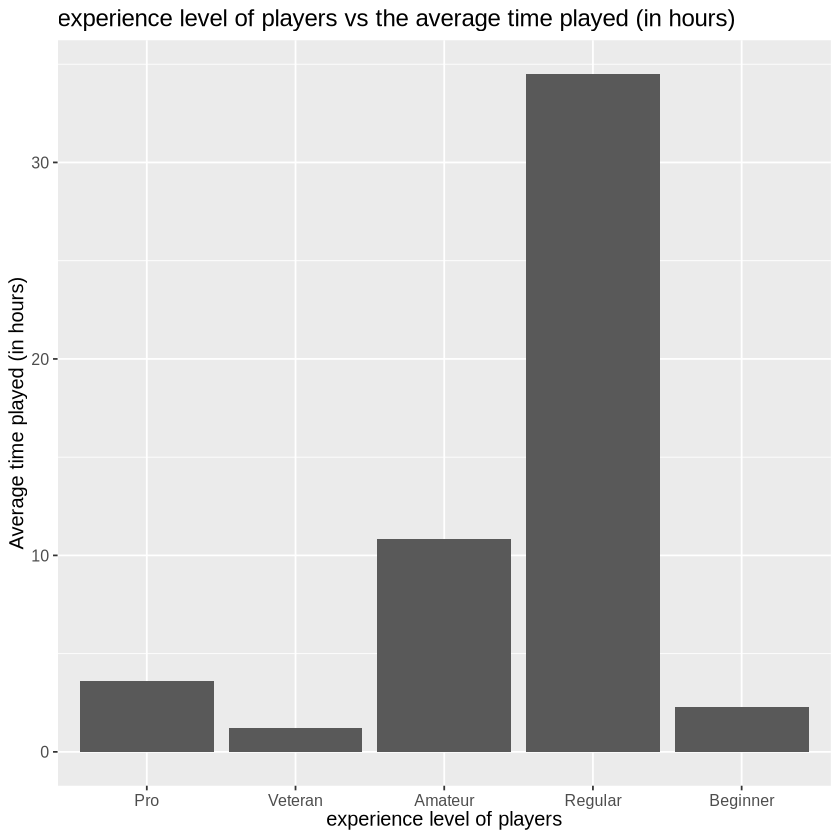

In [7]:
playedtime_plot <- players_tidyset |> group_by(experience) |> 
                    summarize(avg_hours = mean(played_hours, na.rm = TRUE)) |>
                    ggplot(aes(x = experience, y = avg_hours)) + geom_bar(stat = "identity") +
                    labs(x = "experience level of players", y = "Average time played (in hours)", 
                         title = "experience level of players vs the average time played (in hours)") + theme(text = element_text(size = 12)) 
playedtime_plot

### Performing Data Analysis ### 

We are using two predictor variables, age and played_hours, to predict our response variable, experience_level. Since we are using two numerical predictor variables to classify the categorical response variable, we will be using a KNN classification model. To do so, we built a KNN classification model.       
 
We split the players_tidyset into a training and testing data set in order to build a KNN classification model. We split 75% of the data into the training set and 25% into the testing set. 

In [8]:
players_split <- initial_split(players_tidyset, prop = 0.75, strata = experience)
players_train <- training(players_split)
players_test <- testing(players_split)

We preprocessed our training data by creating a recipe, scaling our predictors, and creating our model specification. 

In [18]:
players_recipe <- recipe(experience ~ played_hours + Age, data = players_train) |>
  step_scale(played_hours, Age) |>
  step_center(played_hours, Age) 

To determine the best value of K for our classification model, we used the tune() function, then conducted a 5-fold cross-validation using K values ranging from 1 to 100, increasing by 5. We then tested the accuracy of each K value by …. 

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2



→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x2

There were issues with some computations   A: x2





[1] 11

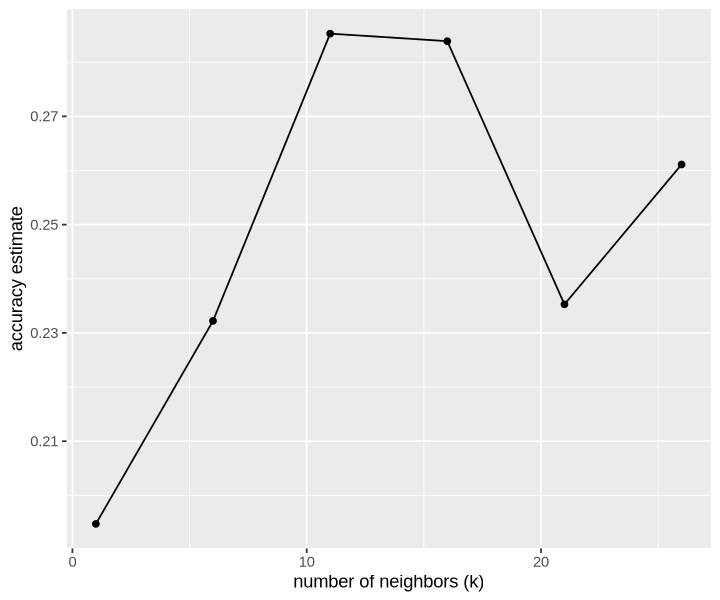

In [35]:
set.seed(1234) 

options(repr.plot.height = 5, repr.plot.width = 6)

### BEGIN SOLUTION
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_recipe <- recipe(experience ~ played_hours + Age, data = players_train) |>
  step_scale(played_hours, Age) |>
  step_center(played_hours, Age)

players_vfold <- vfold_cv(players_train, v = 5, strata = experience)

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 5))

knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec)|>
                 tune_grid(resamples = players_vfold, grid = k_vals)|>
                 collect_metrics()


knn_results2 <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals)|>
  collect_metrics()


accuracies <- knn_results2 |>
  filter(.metric == "accuracy") 

cross_val_plot<-ggplot(accuracies, aes(x=neighbors, y=mean)) + 
geom_point() + geom_line() +labs(x="number of neighbors (k)", y="accuracy estimate")
cross_val_plot 

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

In [47]:
#making new model with chosen k 
knn_spec_k <- nearest_neighbor(weight_func = "rectangular", neighbors =11) |>
            set_engine("kknn") |>
            set_mode("classification")
                        
players_fit<-workflow()|>
add_recipe(players_recipe)|>
add_model(knn_spec_k)|>
fit(data=players_train) 
                             

In [48]:
# making data predictors on testing set 
player_level_predict<-predict(players_fit, players_test)|>
bind_cols(players_test)

player_level_predict

.pred_class,experience,Age,played_hours
<fct>,<fct>,<dbl>,<dbl>
Veteran,Regular,19,0.6
Veteran,Amateur,21,0.7
Beginner,Regular,28,0.6
Amateur,Veteran,17,0.1
Beginner,Veteran,38,0.2
Amateur,Pro,17,1.0
Amateur,Pro,17,0.2
Amateur,Amateur,23,0.1
Pro,Amateur,14,17.2
